In [ ]:
kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 83% 123M/149M [00:00<00:00, 200MB/s]
100% 149M/149M [00:00<00:00, 187MB/s]


In [ ]:
pip install patool
import patoolib
patoolib.extract_archive("/content/brain-tumor-mri-dataset.zip")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 3.3 MB/s eta 0:00:00


INFO patool: Extracting /content/brain-tumor-mri-dataset.zip ...
INFO:patool:Extracting /content/brain-tumor-mri-dataset.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_9azn7071 -- /content/brain-tumor-mri-dataset.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_9azn7071 -- /content/brain-tumor-mri-dataset.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/brain-tumor-mri-dataset.zip extracted to `brain-tumor-mri-dataset' (multiple files in root).
INFO:patool:... /content/brain-tumor-mri-dataset.zip extracted to `brain-tumor-mri-dataset' (multiple files in root).


'brain-tumor-mri-dataset'

In [ ]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os
import cv2
from PIL import Image

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img

In [ ]:
# Initialize empty lists outside the function to accumulate images and labels
TrainImages = []
TrainLabels = []

def load_images_from_directory(main_directory, images, labels):
    # Use os.walk to iterate over all subdirectories and files
    for root, subdirs, files in os.walk(main_directory):
        # Use the folder name as the label (ignores the main directory itself)
        label = os.path.basename(root)

        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Add other image formats if needed
                img_path = os.path.join(root, filename)
                try:
                    image = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
                    image = image.resize((150, 150))  # Resize if needed
                    image = np.array(image)  # Convert to numpy array
                    images.append(image)  # Append the image data

                    # Append the label (subdirectory name) for each image
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

# Main directory containing subfolders of images
main_directory = '/content/brain-tumor-mri-dataset/Training'

# Load images from all subdirectories in the main directory
load_images_from_directory(main_directory, TrainImages, TrainLabels)

# Convert lists to numpy arrays if necessary
TrainLabels = np.array(TrainLabels)

print(f"Total TrainImages loaded: {len(TrainImages)}")
print(f"Unique TrainLabels: {np.unique(TrainLabels)}")


Total TrainImages loaded: 5712
Unique TrainLabels: ['glioma' 'meningioma' 'notumor' 'pituitary']


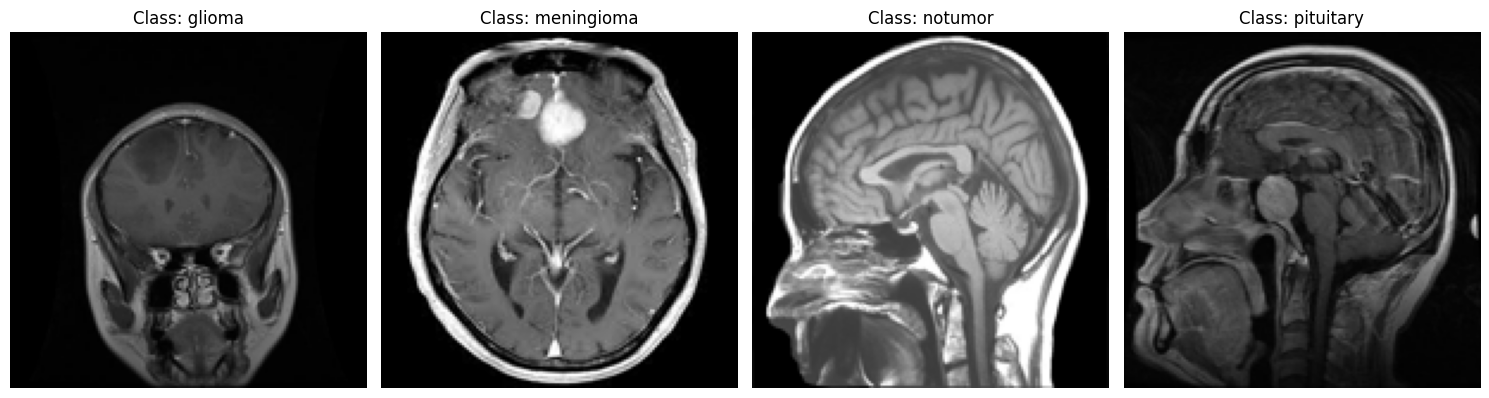

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_one_image_per_class(images, labels):
    """Displays one image from each unique class in a horizontal layout."""

    unique_labels = np.unique(labels)
    num_classes = len(unique_labels)

    # Create a horizontal layout with 1 row and as many columns as unique labels
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))

    for ax, label in zip(axes, unique_labels):
        # Find the index of the first image with this label
        image_index = np.where(labels == label)[0][0]
        image = images[image_index]

        # Display the image on the corresponding axis
        ax.imshow(image)
        ax.set_title(f"Class: {label}")
        ax.axis('off')  # Hide axis ticks

    # Adjust the layout to make sure titles and images fit well
    plt.tight_layout()
    plt.show()

# Call the function with your image and label lists
display_one_image_per_class(TrainImages, TrainLabels)


In [ ]:
import os
from PIL import Image
import numpy as np

# Initialize empty lists outside the function to accumulate images and labels
TestImages = []
TestLabels = []

def load_images_from_directory(main_directory, images, labels):
    # Use os.walk to iterate over all subdirectories and files
    for root, subdirs, files in os.walk(main_directory):
        # Use the folder name as the label (ignores the main directory itself)
        label = os.path.basename(root)

        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Add other image formats if needed
                img_path = os.path.join(root, filename)
                try:
                    image = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
                    image = image.resize((150, 150))  # Resize if needed
                    image = np.array(image)  # Convert to numpy array
                    images.append(image)  # Append the image data

                    # Append the label (subdirectory name) for each image
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

# Main directory containing subfolders of images
main_directory = '/content/brain-tumor-mri-dataset/Testing'

# Load images from all subdirectories in the main directory
load_images_from_directory(main_directory, TestImages, TestLabels)

# Convert lists to numpy arrays if necessary
TestLabels = np.array(TestLabels)

print(f"Total TestImages loaded: {len(TestImages)}")
print(f"Unique TestLabels: {np.unique(TestLabels)}")


Total TestImages loaded: 1311
Unique TestLabels: ['glioma' 'meningioma' 'notumor' 'pituitary']


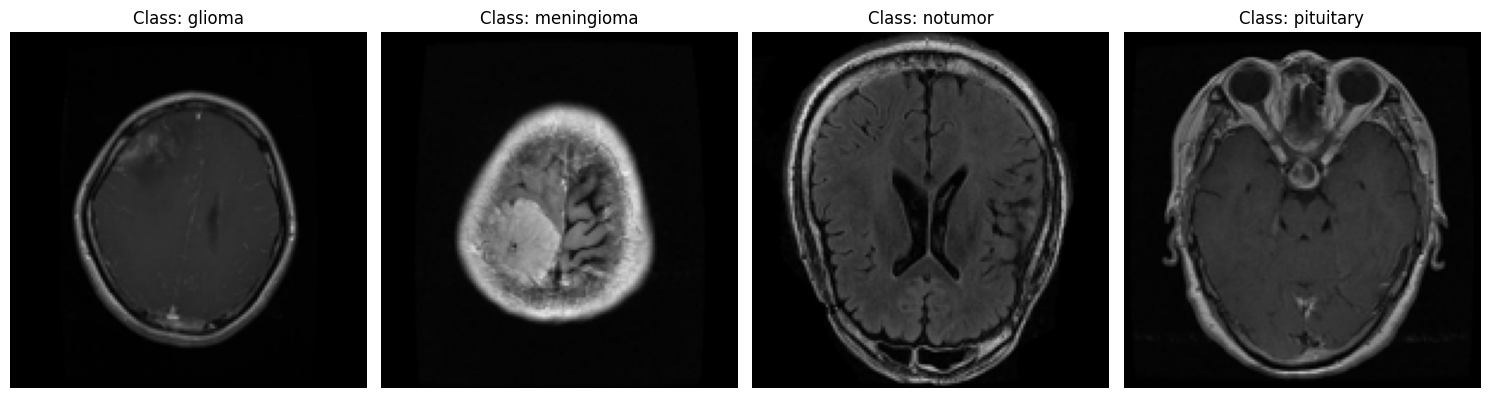

In [ ]:
display_one_image_per_class(TestImages,TestLabels)


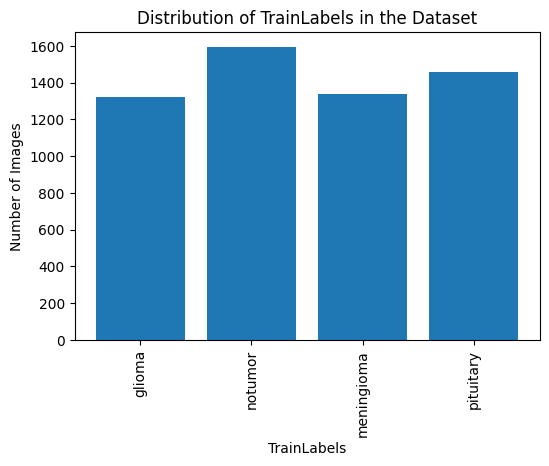

In [ ]:
#visualize the TrainLabels distribution

import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = {}
for label in TrainLabels:
  if label not in label_counts:
    label_counts[label] = 0
  label_counts[label] += 1

# Extract TrainLabels and counts for plotting
label_names = list(label_counts.keys())
label_counts = list(label_counts.values())

# Create a bar chart to visualize the label distribution
plt.figure(figsize=(6, 4))
plt.bar(label_names, label_counts)
plt.xlabel("TrainLabels")
plt.ylabel("Number of Images")
plt.title("Distribution of TrainLabels in the Dataset")
plt.xticks(rotation=90)  # Rotate x-axis TrainLabels for readability if needed
plt.show()


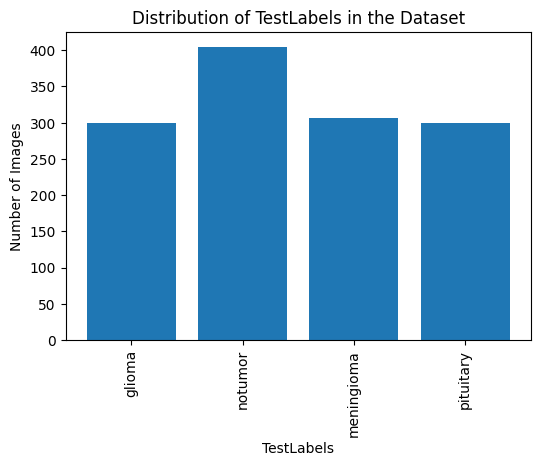

In [ ]:
#visualize the TestLabels distribution

import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = {}
for label in TestLabels:
  if label not in label_counts:
    label_counts[label] = 0
  label_counts[label] += 1

# Extract TestLabels and counts for plotting
label_names = list(label_counts.keys())
label_counts = list(label_counts.values())

# Create a bar chart to visualize the label distribution
plt.figure(figsize=(6, 4))
plt.bar(label_names, label_counts)
plt.xlabel("TestLabels")
plt.ylabel("Number of Images")
plt.title("Distribution of TestLabels in the Dataset")
plt.xticks(rotation=90)  # Rotate x-axis TestLabels for readability if needed
plt.show()


In [ ]:
TrainImages[0].shape

(150, 150, 3)

#Aumentation


In [ ]:
# Convert TrainImages to a NumPy array
TrainImages = np.array(TrainImages)
print(TrainImages.shape)


(5712, 150, 150, 3)


In [ ]:
# convert train images from rgb to gray sclae

# Convert TrainImages to grayscale
gray_TrainImages = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in TrainImages]

# Convert the list of grayscale images to a NumPy array
gray_TrainImages = np.array(gray_TrainImages)

# Reshape grayscale images to have a single channel
gray_TrainImages = gray_TrainImages.reshape(gray_TrainImages.shape[0], gray_TrainImages.shape[1], gray_TrainImages.shape[2], 1)


print(gray_TrainImages.shape)


(5712, 150, 150, 1)


In [ ]:
print(gray_TrainImages.shape)

(5712, 150, 150, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Create an instance of ImageDataGenerator with the desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,        # Rotate images by 20 degrees
    width_shift_range=0.1,    # Shift the width by 10%
    height_shift_range=0.1,   # Shift the height by 10%
    shear_range=0.1,          # Apply shear transformation
    zoom_range=0.1,           # Apply zoom transformation
    horizontal_flip=True,     # Flip the images horizontally
    fill_mode='nearest'       # Fill in missing pixels
)

# Assuming TrainImages is your NumPy array of training images
# Assuming TrainLabels is your NumPy array of training labels
augmented_images = []
augmented_labels = []
num_augmented_images_per_sample = 1  # Number of augmented images to generate per original image

for image, label in zip(gray_TrainImages, TrainLabels):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    batch_generator = datagen.flow(image, batch_size=1)

    # Generate multiple augmented versions of each image
    for _ in range(num_augmented_images_per_sample):
        augmented_image = next(batch_generator)[0].astype(np.uint8)  # Generate augmented image
        augmented_images.append(augmented_image)
        augmented_labels.append(label)  # Append the label of the original image

# Convert the list of augmented images and labels back to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine original and augmented images and labels to form the new training set
expanded_train_images = np.concatenate((gray_TrainImages, augmented_images), axis=0)
expanded_train_labels = np.concatenate((TrainLabels, augmented_labels), axis=0)

print(f"Original dataset size: {len(gray_TrainImages)}")
print(f"Augmented dataset size: {len(expanded_train_images)}")
print(f"Original label size: {len(TrainLabels)}")
print(f"Augmented label size: {len(expanded_train_labels)}")


Original dataset size: 5712
Augmented dataset size: 11424
Original label size: 5712
Augmented label size: 11424


In [ ]:
# Convert Image and Label Lists to Numpy Arrays
# Normalize the images by converting pixel values to the range [0, 1]
X = np.array(expanded_train_images, dtype='float32') / 255.0

# Encode the labels using LabelEncoder and convert them to categorical (one-hot encoded) labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(expanded_train_labels)  # Convert labels to numeric values
y = to_categorical(y, num_classes=len(np.unique(expanded_train_labels)))  # One-hot encode the labels

In [ ]:
print(X.shape)
print(y.shape)

(11424, 150, 150, 1)
(11424, 4)


In [ ]:
#Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Build the CNN Model for Image Classification
model = Sequential()

# Convolutional layers
# Updated input shape to match X_train shape (150, 150, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Assuming 'TrainLabels' is available and represents the target labels
model.add(Dense(len(np.unique(TrainLabels)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,292 (18.42 MB)

 Trainable params: 4,828,292 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Add EarlyStopping to stop training when the validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs to wait before stopping if no improvement
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Add ReduceLROnPlateau to reduce the learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,          # Factor by which the learning rate will be reduced
    patience=3,          # Number of epochs to wait before reducing the learning rate
    min_lr=1e-6,         # Lower bound on the learning rate
    verbose=1
)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,           # Maximum number of epochs to train
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]  # Include the callbacks here
)

Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5946 - loss: 0.9459 - val_accuracy: 0.8136 - val_loss: 0.4824 - learning_rate: 0.0010
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.8041 - loss: 0.5030 - val_accuracy: 0.8306 - val_loss: 0.4324 - learning_rate: 0.0010
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8514 - loss: 0.3931 - val_accuracy: 0.8643 - val_loss: 0.3625 - learning_rate: 0.0010
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8775 - loss: 0.3161 - val_accuracy: 0.8621 - val_loss: 0.3802 - learning_rate: 0.0010
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9002 - loss: 0.2562 - val_accuracy: 0.8753 - val_loss: 0.3535 - learning_rate: 0.0010
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9284 - loss: 0.1839 - val_accuracy: 0.8884 - val_loss: 0.3141 - learning_rate: 0.0010
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9458 - lo

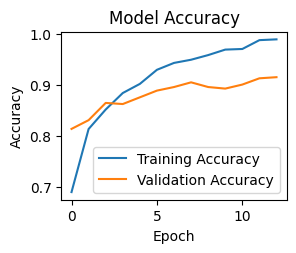

In [ ]:
# Plot training & validation accuracy values
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

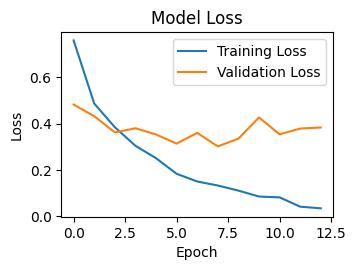

In [ ]:
# Plot training & validation loss values
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Convert TrainImages to grayscale
gray_TestImages = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in TestImages]

# Convert the list of grayscale images to a NumPy array
gray_TestImages = np.array(gray_TestImages)

# Reshape grayscale images to have a single channel
gray_TestImages = gray_TestImages.reshape(gray_TestImages.shape[0], gray_TestImages.shape[1], gray_TestImages.shape[2], 1)


print(gray_TestImages.shape)

(1311, 150, 150, 1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
              precision    recall  f1-score   support

      glioma       0.99      0.89      0.94       300
  meningioma       0.88      0.92      0.90       306
     notumor       0.97      0.99      0.98       405
   pituitary       0.96      0.98      0.97       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



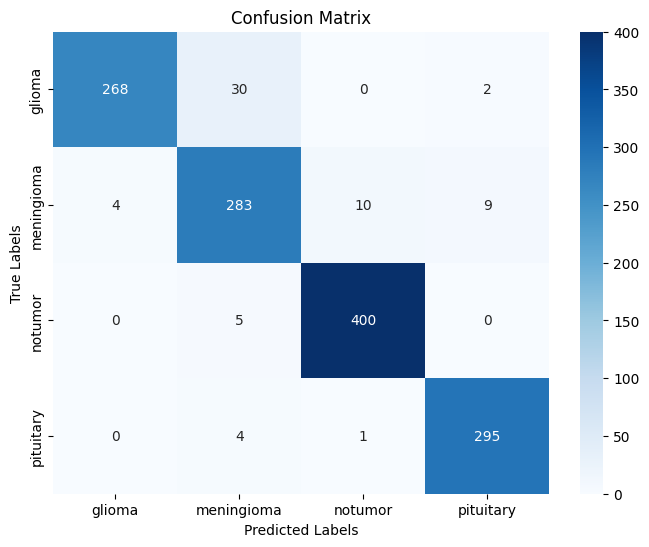

In [ ]:
# prompt: visualize accuracy matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have your test data and labels as X_test and y_test
X_test = np.array(gray_TestImages, dtype='float32') / 255.0
y_test = label_encoder.transform(TestLabels)  # Use the same label encoder used for training

# Make predictions on the test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Step 8: Save the Trained Model
model.save('brain_tumor_classifier_model.h5')